<a href="https://colab.research.google.com/github/shrijareddy/Image-Classification/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data : Images
# using python libraries to scrape the images


In [ ]:
!pip install bing-image-downloader


In [ ]:
!mkdir images

In [ ]:
from bing_image_downloader import downloader

In [ ]:
downloader.download("motor bike images", limit=30,output_dir='images',adult_filter_off=True)

[%] Downloading Images to /content/images/motor bike images


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://electricbikeaction.com/wp-content/uploads/2014/02/BRD_RedShiftMX_side_ToddTankersley.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://1.bp.blogspot.com/-MYBB51rGgCg/TzokuYVIJPI/AAAAAAAAGo4/UoCQ-50uy_k/s1600/1.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://3.bp.blogspot.com/--MN26I45a4I/TidcRK6vBPI/AAAAAAAAAPs/P74LIf3JWTM/s1600/12.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://4.bp.blogspot.com/-T7z1v2uyJCk/Uu4N1eVNzeI/AAAAAAAAAU8/J_kPtTurcEk/s1600/motoczysz_racing_bike-normal.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://silodrome.com/wp-content/uploads/2017/08/ExoDyne-Electric-Motorcycle-14.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://blog.nationwide.com/wp-content/uploads/2015/06/Cruiser-Motorcycle-2000.jpg
[%] File Downloaded !

[%] Downloa

In [ ]:
downloader.download("car pictures", limit=30,output_dir='images',adult_filter_off=True)

[%] Downloading Images to /content/images/car pictures


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from http://wallup.net/wp-content/uploads/2016/03/12/341770-Audi_R8-car-vehicle-Super_Car-electric_car-blue_cars.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://static.pexels.com/photos/63764/pexels-photo-63764.jpeg
[%] File Downloaded !

[%] Downloading Image #3 from https://cdn.vox-cdn.com/thumbor/IZ7fpJNSeEO1v2vNapVlLYlCWzc=/214x0:1037x549/1200x800/filters:focal(214x0:1037x549)/cdn.vox-cdn.com/uploads/chorus_image/image/45200072/new-ford-gt-supercar-0006.0.0.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://static1.hotcarsimages.com/wordpress/wp-content/uploads/2020/04/cars-to-modify.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://4.bp.blogspot.com/-W2rT6DiYko0/UOol6OWBfVI/AAAAAAAAE_E/3l3jKDQiAGo/s1600/738337_492628620787429_400049271_o.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http:

In [ ]:
#Preprocessing
#1.Resize
#2.Flatten
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize


target=[]
images=[]
flat_data=[]

DATADIR='/content/images'
CATEGORIES=['car pictures','motor bike images']

for category in CATEGORIES:
  class_num=CATEGORIES.index(category) # Label Encoding the values
  path=os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    #print(img_array.shape)
    #plt.imshow(img_array)
    img_resized=resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)


flat_data=np.array(flat_data)
target=np.array(target)
images=np.array(images)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
len(flat_data[0])

67500

In [ ]:

#SPLIT DATA INTO TRAINING AND TESTING
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(flat_data,target,test_size=0.2,random_state=109)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid=[
       {'C':[1,10,100,1000],'kernel':['linear']},
     {'C':[1,10,100,1000],'gamma':[0.001,0.0001], 'kernel':['rbf']}
]

svc=svm.SVC(probability=True)
clf=GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)


GridSearchCV(estimator=SVC(probability=True),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

In [ ]:
y_pred=clf.predict(x_test)
y_pred


array([1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1])

In [ ]:
y_test

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
accuracy_score(y_pred,y_test)

0.75

In [ ]:
confusion_matrix(y_pred, y_test)

array([[4, 0],
       [3, 5]])

In [ ]:
#Save the model using pickle library
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [ ]:

model=pickle.load(open('img_model.p','rb'))

Enter your URLhttps://images.unsplash.com/photo-1605559424843-9e4c228bf1c2?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8Mnx8bWVyY2VkZXMlMjBjYXJ8ZW58MHx8MHx8fDA%3D&w=1000&q=80
(1250, 1000, 3)
PREDICTED OUTPUT: car pictures


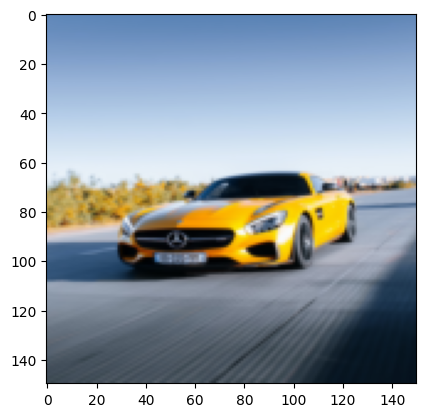

In [ ]:
#Testing a brand new Image

flat_data=[]
url=input('Enter your URL')
img=imread(url)
img_resized=resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data=np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out=model.predict(flat_data)
y_out=CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT: {y_out}')



In [ ]:
!pip install streamlit
!pip install streamlit-drawable-canvas
!pip install pyngrok==4.1.1




In [ ]:
!ngrok authtoken 2V0dLC3TPPxAWKoqFcvybMJUlfI_2bBzVZpabfSCeanexHhv3

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
from pyngrok import ngrok

In [ ]:
# Deployment:
# 1. Webpage - HTML,CSS,JSS
# 2. WebApp-Streamlit/Dash
# 3. Mobile App-Kotlin/Java




In [ ]:
%%writefile app.py
import streamlit as st
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import pickle
from PIL import Image
st.set_option('deprecation.showfileUploaderEncoding', False)
st.title('Image Classification using Machine Learning')
st.text('Upload Image')

model=pickle.load(open('img_model.p','rb'))


uploaded_file=st.file_uploader("Choose an image..", type="jpg")

if uploaded_file is not None:
   img=Image.open(uploaded_file)
   st.image(img,caption='Upload Image')
if st.button('PREDICT'):
   CATEGORIES=['car pictures','motor bike images']
   st.write('Result.....')
   flat_data=[]
   img=np.array(img);
   img_resized=resize(img,(150,150,3))
   flat_data.append(img_resized.flatten())
   flat_data=np.array(flat_data)
   y_out=model.predict(flat_data)
   y_out=CATEGORIES[y_out[0]]
   st.title(f'PREDICTED OUTPUT: {y_out}')
   q=model.predict_proba(flat_data)
   for index, item in enumerate(CATEGORIES):
      st.write(f'{item} : {q[0][index]*100}%')



Overwriting app.py


In [ ]:
!nohup streamlit run app.py &


url = ngrok.connect(port='8501')
url

nohup: appending output to 'nohup.out'


'http://e5c7-34-148-243-206.ngrok-free.app'

In [ ]:
ngrok.kill()